In [1]:
import pandas as pd
from upsetplot import from_contents
from upsetplot import UpSet
from matplotlib import pyplot as plt
from upsetplot import generate_counts

In [2]:
df=pd.read_csv("UpsetPlot_GapFilling_IndusGroup.csv", encoding='latin-1')
df.head()

,Urban_Industrial,Rural_Industrial,Rural_Traditional,Isolated_Traditional
0,1,1.0,1.0,1.0
1,3,3.0,3.0,3.0
2,4,4.0,4.0,4.0
3,5,5.0,5.0,5.0
4,6,6.0,6.0,6.0


In [3]:
lists_of_filename=["UpsetPlot_GapFilling_IndusGroup.csv"]

In [4]:
list_of_types=["Industrialization Groups"]

In [5]:
counter=0

In [6]:
for file in lists_of_filename:
    df = pd.read_csv(file, encoding='latin-1')

In [7]:
Urban_Industrial = df['Urban_Industrial'].dropna().drop_duplicates().tolist()
Rural_Industrial = df['Rural_Industrial'].dropna().drop_duplicates().tolist()
Rural_Traditional = df['Rural_Traditional'].dropna().drop_duplicates().tolist()
Isolated_Traditional = df['Isolated_Traditional'].dropna().drop_duplicates().tolist()

In [8]:
indus_groups = from_contents({'Urban_Industrial': Urban_Industrial,
                             'Rural_Industrial': Rural_Industrial,
                             'Rural_Traditional': Rural_Traditional,
                             'Isolated_Traditional': Isolated_Traditional})

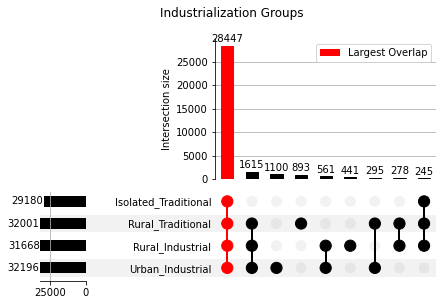

In [9]:
upset_plt=UpSet(indus_groups, sort_categories_by=None, sort_by='cardinality',
               min_subset_size=200, facecolor='black', other_dots_color=0.05,
               shading_color=0.05, with_lines=True, element_size=32, show_counts=True,
               show_percentages=False)
upset_plt.style_subsets(min_subset_size=6000, label="Largest Overlap", facecolor="red")
upset_plt.plot()
plt.suptitle(list_of_types[counter])
plt.savefig(list_of_types[counter]+"_upset_Indus.jpeg",
           bbox_inches="tight")
counter += 1